In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Import file
path = r'/Users/jorisjan/Documents/CareerFoundry/Assistance for disabled people in stations - Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned assistance.pkl'))

### 2. Data cleaning

In [4]:
df.columns

Index(['year', 'station_code', 'station_name', 'region_sncf', 'departement',
       'departement_code', 'zip_code', 'municipality', 'longitude', 'latitude',
       'total_passengers_over_the_year', 'station_category', 'service_level',
       'wheelchair_available_in_station', 'simple_assistance',
       'ramp_assistance', 'wheelchair_assistance',
       'ramp_and_wheelchair_assistance', 'total_assistance'],
      dtype='object')

In [5]:
df.head(20)

,year,station_code,station_name,region_sncf,departement,departement_code,zip_code,municipality,longitude,latitude,total_passengers_over_the_year,station_category,service_level,wheelchair_available_in_station,simple_assistance,ramp_assistance,wheelchair_assistance,ramp_and_wheelchair_assistance,total_assistance
0,2015,87111849,Marne-la-Vallee Chessy,REGION DE PARIS-SUD-EST,Seine-et-Marne,77,77700,Chessy,2.782720,48.869856,5443822,3,1,1,3677,2081,78,9357,15193
1,2015,87113001,Paris Est,REGION DE PARIS-EST,Paris,75,75010,Paris,2.358424,48.876742,34919689,3,1,1,3610,2946,161,11133,17850
2,2015,87116582,Chateau-Thierry,REGION DE PARIS-EST,Aisne,02,02400,Chateau-Thierry,3.409514,49.038224,1924022,2,2,1,29,5,0,149,183
3,2015,87118000,Troyes,REGION CHAMPAGNE-ARDENNE,Aube,10,10014,Troyes,4.065281,48.296069,1001917,3,2,1,72,145,7,518,742
4,2015,87118158,Romilly-sur-Seine,REGION DE PARIS-EST,Aube,10,10100,Romilly-sur-Seine,3.728887,48.514433,306218,2,3,0,25,45,0,113,183
5,2015,87141002,Nancy,REGION LORRAINE,Meurthe-et-Moselle,54,54000,Nancy,6.174583,48.689861,7918088,3,1,1,3569,968,79,8651,13267
6,2015,87141044,Toul,REGION LORRAINE,Meurthe-et-Moselle,54,54200,Toul,5.880615,48.679018,232067,2,2,0,430,40,7,576,1053
7,2015,87141150,Luneville,REGION LORRAINE,Meurthe-et-Moselle,54,54300,Luneville,6.497270,48.588233,923786,2,2,0,87,28,3,255,373
8,2015,87141291,Neufchateau,REGION LORRAINE,Vosges,88,88300,Neufchateau,5.690402,48.358343,80707,1,3,0,13,23,0,189,225
9,2015,87141820,Pont-a-Mousson,REGION LORRAINE,Meurthe-et-Moselle,54,54700,Pont-a-Mousson,6.050842,48.900580,979424,2,3,0,280,5,2,367,654


In [6]:
df.shape

(5409, 19)

##### Missing values

In [7]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

year                               0
station_code                       0
station_name                       0
region_sncf                        0
departement                        0
departement_code                   0
zip_code                           0
municipality                       0
longitude                          0
latitude                           0
total_passengers_over_the_year     0
station_category                   0
service_level                      0
wheelchair_available_in_station    0
simple_assistance                  0
ramp_assistance                    0
wheelchair_assistance              0
ramp_and_wheelchair_assistance     0
total_assistance                   0
dtype: int64

##### Duplicates check

In [8]:
dups = df.duplicated()

In [9]:
dups.shape # No dups

(5409,)

##### Extreme values checks

/var/folders/dt/sqcrp8bd1cx8p99whrf_c9wr0000gn/T/ipykernel_54516/1146993270.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_assistance'], bins=25) # Shows extreme values
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_assistance', ylabel='Density'>

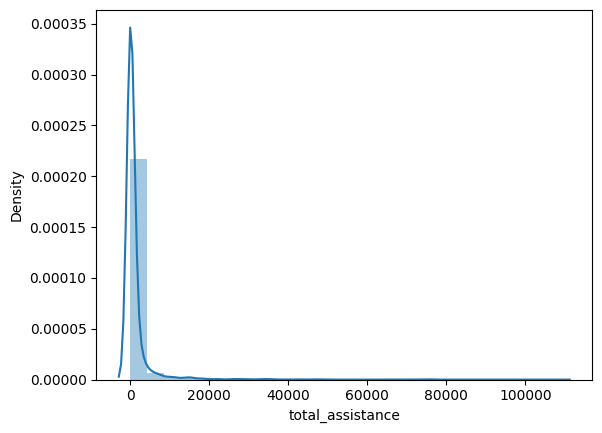

In [10]:
sns.distplot(df['total_assistance'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [11]:
df['total_assistance'].mean() # Check the mean

1265.763172490294

In [12]:
df['total_assistance'].median() # Check the median

66.0

In [13]:
df['total_assistance'].max() # Check the max

108406

### 3. Data prep for regression analysis 

In [1]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'total_assistance', y='ramp_assistance',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('total_assistance vs ramp_assistance')  
plt.xlabel('total_assistance')  
plt.ylabel('ramp_assistance')  
plt.show()

NameError: name 'df' is not defined

Hypothesis:
There is a strong positive linear relationship between the number of ramp assistance services provided and the total number of assistance services at a station. In other words, as the provision of ramp assistance increases, the total assistance provided also increases proportionally.

This hypothesis is supported by the tight clustering of data points along a line in the scatterplot, which suggests that 'ramp_assistance' is a significant predictor of 'total_assistance'. The presence of a line of best fit, if it has been calculated as part of a regression analysis, would further suggest that this relationship can be modeled mathematically, indicating a potential causal relationship where improvements in 'ramp_assistance' services could lead to an overall increase in the 'total_assistance' services provided at a station.

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['total_assistance'].values.reshape(-1,1)
y = df['ramp_assistance'].values.reshape(-1,1)

In [35]:
X

array([[15193],
       [17850],
       [  183],
       ...,
       [    3],
       [  558],
       [    1]])

In [36]:
y

array([[2081],
       [2946],
       [   5],
       ...,
       [   2],
       [ 109],
       [   0]])

In [37]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [38]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [39]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

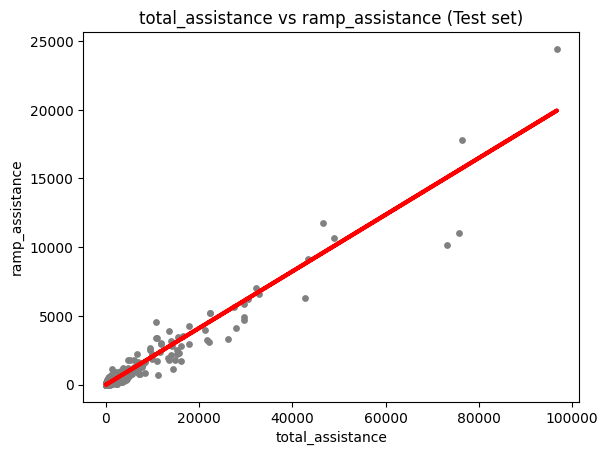

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('total_assistance vs ramp_assistance (Test set)')
plot_test.xlabel('total_assistance')
plot_test.ylabel('ramp_assistance')
plot_test.show()

As 'total_assistance' increases, the data points tend to spread out more around the regression line, and the prediction errors seem to increase. This is indicated by the distance of the points from the line, which becomes more variable for higher values of 'total_assistance'.

The regression line appears to be a good fit for the lower and mid-range of the data but less so at the upper end. This could mean that the linear model may need to be adjusted or that a non-linear model might be more appropriate for capturing the relationship between 'total_assistance' and 'ramp_assistance' across the full range of data.

In [42]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20623794]]
Mean squared error:  86050.82568246646
R2 score:  0.9334280751594544


**Slope:**
The slope of the regression line is approximately 0.206, which means for every unit increase in 'total_assistance', 'ramp_assistance' increases by 0.206 units, on average

**Mean Squared Error (MSE):**
The MSE of the model is 86050.83, this high value of MSE suggests that there is a significant variation in the data that the model is not capturing.

**R² Score:**
The R² score is approximately 0.933, which is very close to 1. This score indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² score of 0.933 means that approximately 93.3% of the variance in 'ramp_assistance' is predictable from 'total_assistance'.

In [44]:
y_predicted

array([[-7.0413098 ],
       [-9.9286409 ],
       [-5.18516838],
       ...,
       [-4.1539787 ],
       [-4.1539787 ],
       [11.5201044 ]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,-7.041310
1,0,-9.928641
2,23,-5.185168
3,68,11.520104
4,0,-9.309927
5,63,36.268657
6,146,170.529553
7,59,51.736502
8,0,-9.928641
9,27,2.033159


* In cases where the actual value is 0 (rows 0, 1, 4, 8, 10, etc.), the model predicts negative values, which may not be meaningful in the real-world context if the 'y' values are counts that cannot be negative (e.g., number of assistance services).
* For some rows (e.g., row 11 with an actual value of 837), the predicted value is significantly higher (1708.85), indicating overestimation by the model.
* For other rows (e.g., row 2 with an actual value of 23), the predicted value is an underestimation (-5.82).
* There are instances where the model predicts values fairly close to the actual numbers (e.g., row 7 with an actual value of 59 and a predicted value of 51.74).

The discrepancies between actual and predicted values could contribute to the Mean Squared Error (MSE) discussed earlier. Specifically, the negative predictions when the actual value is zero will significantly impact the MSE, as the squared errors for these predictions will be relatively large compared to the actual values.

Overall, while the model seems to capture the trend in the data, as indicated by the high R² score, there are individual predictions where the model is not accurate. This could be due to outliers, non-linear relationships, or other factors not accounted for in the model.

In [46]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20623794]]
Mean squared error:  74152.37530717856
R2 score:  0.9382790404103666


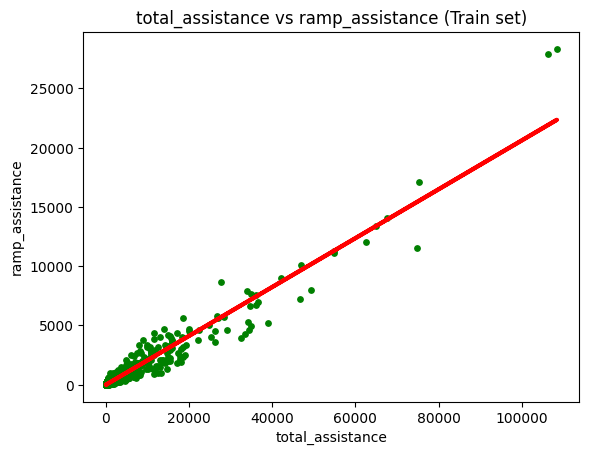

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('total_assistance vs ramp_assistance (Train set)')
plot_test.xlabel('total_assistance')
plot_test.ylabel('ramp_assistance')
plot_test.show()

The regression line seems to fit the training set data quite well. The points are closely clustered around the line, which indicates that the model's predictions are generally in line with the actual values for this set.
The points do not appear to show the same level of spread as we move along the x-axis as was noted in the test set. This consistency suggests the model has learned the patterns from the training data effectively.

removing outliers is not a suitable approach for this context since it would ignore the most important stations in the country. The model needs to be able to generalize across all stations, which may require exploring more sophisticated modeling techniques that can handle the increased complexity and variability associated with the busiest stations in urban areas, especially in Paris. The goal should be to create a model that provides accurate predictions across the full spectrum of stations, from the smallest to the largest, accounting for the unique challenges presented by high-traffic environments.